# Assignment 03

- Name: Ran Arino
- Student ID: 153073200
- Email: rarino@myseneca.ca
- Course: Machine Learning
- Course ID: BDA500NAA.05380.2237
- Professor: Dr. Amir Moslemi

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# 1. Data Preparation & Observation

In [2]:
# 1-1: load dataset

col_names = ['age', 'year', 'axillary', 'survival']
df = pd.read_csv('haberman.csv', header=None, names=col_names)
df.head()

,age,year,axillary,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
# 1-2: check meta data and missing values

# dimention
print("Dimenison: ", df.shape)
print('')
# dtypes
print('Data Types:')
print(df.dtypes)
print('')
# missing data 
print('Missing Data: ')
print(df.isna().sum())

Dimenison:  (306, 4)

Data Types:
age         int64
year        int64
axillary    int64
survival    int64
dtype: object

Missing Data: 
age         0
year        0
axillary    0
survival    0
dtype: int64


In [4]:
# 1-3: change target label

df['survival'] = df['survival'].map({1: 1, 2: 0})
print(df['survival'].value_counts())

survival
1    225
0     81
Name: count, dtype: int64


In [5]:
# 1-4: fundamental statistics
df.describe()

,age,year,axillary,survival
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [12]:
# 1-4 Cont.: removing an outlier 
df = df[df['axillary'] != 52]
print("New dimention: ", df.shape)

New dimention:  (305, 4)


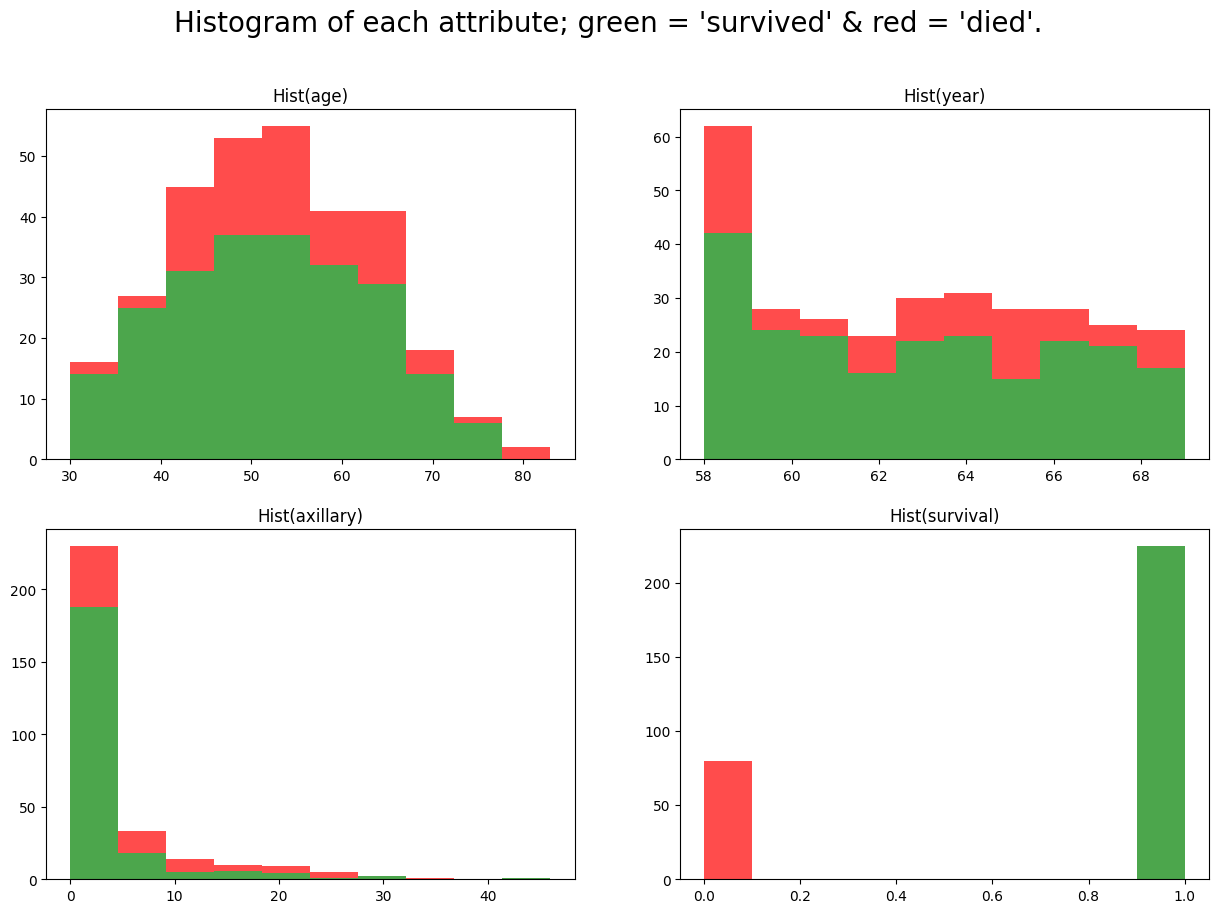

In [21]:
# 1-5: histogram for each data
R, C = 2, 2
fig, ax = plt.subplots(nrows=R, ncols=C, figsize=(15, 10))


for i, col in enumerate(df.columns):
    x, y = i // R, i % C
    data_survived = df[df['survival'] == 1][col]
    data_died = df[df['survival'] == 0][col]

    ax[x][y].hist([data_survived, data_died], color=['green', 'red'], alpha=0.7, stacked=True)
    ax[x][y].set_title(f'Hist({col})')

fig.suptitle("Histogram of each attribute; green = 'survived' & red = 'died'.", size=20)
plt.show()

# 2. Model Creation & Evaluation

In [26]:
# 2-1: splitting dataset

x = np.array(df[['axillary', 'age', 'year']])
y = np.array(df['survival'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print(f'Train -> x: {len(x_train)}, y: {len(y_train)}')
print(f'Test -> x: {len(x_test)}, y: {len(y_test)}')

Train -> x: 213, y: 213
Test -> x: 92, y: 92


In [29]:
# 2-2: apply logistic regression

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
yhat_log_reg = log_reg.predict(x_test)
confusion_matrix(y_test, yhat_log_reg)

array([[ 6, 17],
       [ 8, 61]], dtype=int64)

In [ ]:
# 2-3: apply SVM model

In [ ]:
# 2-4: apply KNN model
